# Part 2: Regression practice

這次使用到的是紅酒的[資料集](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)，透過以下參數要預測紅酒品質(quality)
- fixed acidity 固定酸度
- volatile acidity 揮發酸度
- citric acid 檸檬酸
- residual sugar 剩餘的糖份
- chlorides 酒中的鹽量
- free sulfur dioxide 酒中帶硫元素的離子
- total sulfur dioxide 二氧化硫
- density 密度
- pH 酸鹼度
- sulphates 硫酸鹽
- alcohol 酒精濃度
- quality 酒的品質，介於0~10分

可以透過參考`regression_tf_keras_part1.ipynb`來進行練習

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import matplotlib.pyplot as plt

print(tf.__version__) #確認是2.0版本

C:\Users\maxlin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\maxlin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\maxlin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\maxlin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: P

ModuleNotFoundError: No module named 'tensorflow_docs'

# download and read dataset

In [2]:
dataset_path = keras.utils.get_file("winequality-red.csv", "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
dataset_path

90112/84199 [================================] - 0s 5us/step


'C:\\Users\\maxlin\\.keras\\datasets\\winequality-red.csv'

In [3]:
dataset = pd.read_csv(dataset_path,sep=";", na_values = "?")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Clean the data

In [4]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Split the data into train and test

Now split the dataset into a training set and a test set.

We will use the test set in the final evaluation of our model.

In [5]:
train = dataset.sample(frac=0.8,random_state=0)
test = dataset.drop(train.index)

In [6]:
train = np.array(train)
test = np.array(test)

### Split features from labels

Separate the target value from the features. This label is the value that you will train the model to predict.

In [11]:
train_x = train[:,:-1]
train_y = train[:,-1:]
test_x = test[:,:-1]
test_y = test[:,-1:]

### Know how many training and test samples

In [12]:
print("train_x shape: " + str(train_x.shape))
print("train_y shape: " + str(train_y.shape))
print("test_x shape: " + str(test_x.shape))
print("test_y shape: " + str(test_y.shape)) 

train_x shape: (1279, 11)
train_y shape: (1279, 1)
test_x shape: (320, 11)
test_y shape: (320, 1)


### Normalize the data

In [13]:
def compute_mean_std(X):
    """ 
    X: 訓練資料 
    mu: 平均數
    sigma: 標準差
    """  
    # hint 若利用np.mean()，需加上`keepdim=True`。
    mu = np.mean(X, keepdims = True , axis=0)
    sigma = np.std(X, keepdims = True , axis=0)

    return mu, sigma

# 利用平均數跟標準差進行標準化
def normalize_feat(X, mu, sigma):

    normalized_X = (X - mu) / sigma
    
    return normalized_X



mu, sigma = compute_mean_std(train_x)

# 讓訓練資料跟測試資料都進行標準化

train_x = normalize_feat(train_x, mu, sigma)
test_x = normalize_feat(test_x, mu, sigma)

# Build the model

In [14]:
def build_model(input_dim,learning_rate):
    
    
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_dim,)),  #input維度為(input_dim,*) output維度為(*,64)
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
  ])
    optimizer = tf.keras.optimizers.RMSprop(lr=learning_rate)
    
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [15]:
dim = train_x.shape[1]
learning_rate=0.001

model = build_model(input_dim=dim,learning_rate=learning_rate)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [13]:
EPOCHS = 500

history = model.fit(
  train_x, train_y,
  epochs=EPOCHS, verbose=0,validation_split = 0.2,
  callbacks=[tfdocs.modeling.EpochDots()],)


Epoch: 0, loss:16.2752,  mae:3.7189,  mse:16.2752,  val_loss:6.1906,  val_mae:2.1179,  val_mse:6.1906,  
....................................................................................................
Epoch: 100, loss:0.2027,  mae:0.3464,  mse:0.2027,  val_loss:0.5166,  val_mae:0.5163,  val_mse:0.5166,  
....................................................................................................
Epoch: 200, loss:0.1392,  mae:0.2866,  mse:0.1392,  val_loss:0.5539,  val_mae:0.5292,  val_mse:0.5539,  
....................................................................................................
Epoch: 300, loss:0.0981,  mae:0.2392,  mse:0.0981,  val_loss:0.7453,  val_mae:0.6334,  val_mse:0.7453,  
....................................................................................................
Epoch: 400, loss:0.0728,  mae:0.2079,  mse:0.0728,  val_loss:0.6386,  val_mae:0.5718,  val_mse:0.6386,  
......................................................................

# Plot MAE and MSE

In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.069560,0.201191,0.069560,0.619485,0.539580,0.619485,495
496,0.066953,0.195916,0.066954,0.633239,0.566747,0.633239,496
497,0.064331,0.197402,0.064331,0.643927,0.559727,0.643927,497
498,0.062889,0.193645,0.062889,0.682026,0.582917,0.682026,498
499,0.073220,0.211333,0.073220,0.632919,0.553293,0.632919,499


In [15]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [WINE]')

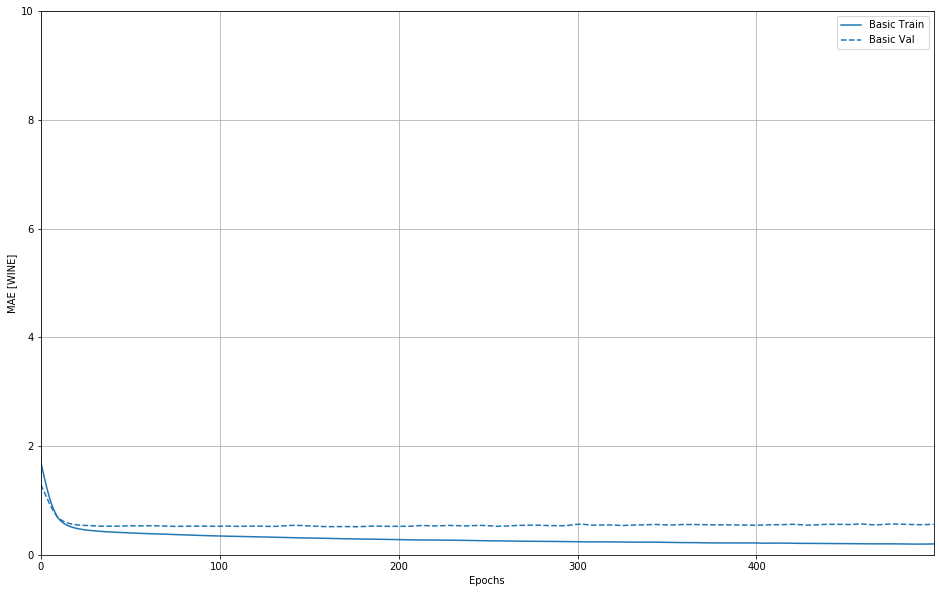

In [16]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [WINE]')

Text(0, 0.5, 'MSE [WINE^2]')

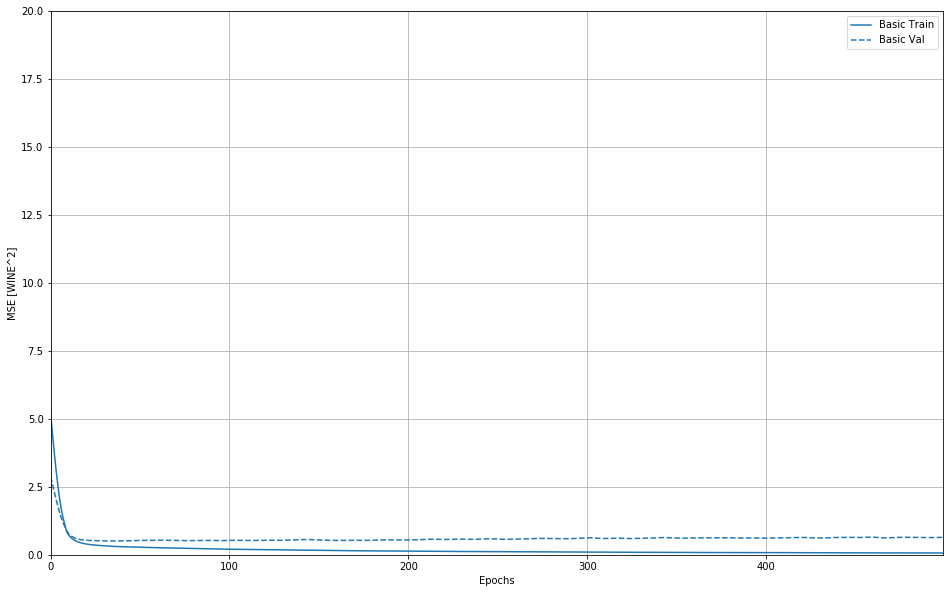

In [17]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [WINE^2]')